In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing datasets

For this project, I will use FitBit Fitness Tracker Data

In [2]:
# Define file paths
activity_file = '/dailyActivity_merged.csv'
calories_file = '/hourlyCalories_merged.csv'
intensities_file = '/hourlyIntensities_merged.csv'
sleep_file = '/sleepDay_merged.csv'
weight_file = '/weightLogInfo_merged.csv'

# Read the CSV files into DataFrames
activity_df = pd.read_csv(activity_file)
calories_df = pd.read_csv(calories_file)
intensities_df = pd.read_csv(intensities_file)
sleep_df = pd.read_csv(sleep_file)
weight_df = pd.read_csv(weight_file)

# Display the first few rows of each DataFrame to verify successful loading
print("Activity DataFrame:")
print(activity_df.head())

print("\nCalories DataFrame:")
print(calories_df.head())

print("\nIntensities DataFrame:")
print(intensities_df.head())

print("\nSleep DataFrame:")
print(sleep_df.head())

print("\nWeight DataFrame:")
print(weight_df.head())


Activity DataFrame:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366      4/12/16       13162           8.50             8.50   
1  1503960366      4/13/16       10735           6.97             6.97   
2  1503960366      4/14/16       10460           6.74             6.74   
3  1503960366      4/15/16        9762           6.28             6.28   
4  1503960366      4/16/16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0 

In [3]:
# Fix date formatting and separate date and time components

# Activity DataFrame
activity_df['ActivityDate'] = pd.to_datetime(activity_df['ActivityDate'], format='%m/%d/%y')
activity_df['Date'] = activity_df['ActivityDate'].dt.date

# Calories DataFrame
calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'], format='%m/%d/%y %H:%M')
calories_df['Date'] = calories_df['ActivityHour'].dt.date
calories_df['Hour'] = calories_df['ActivityHour'].dt.time

# Intensities DataFrame
intensities_df['ActivityHour'] = pd.to_datetime(intensities_df['ActivityHour'], format='%m/%d/%y %H:%M')
intensities_df['Date'] = intensities_df['ActivityHour'].dt.date
intensities_df['Hour'] = intensities_df['ActivityHour'].dt.time

# Sleep DataFrame
sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
sleep_df['Date'] = sleep_df['SleepDay'].dt.date

# Weight DataFrame
weight_df['Date'] = pd.to_datetime(weight_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
weight_df['LogDate'] = weight_df['Date'].dt.date
weight_df['LogTime'] = weight_df['Date'].dt.time

# Display the first few rows of each DataFrame to verify successful formatting
print("Activity DataFrame:")
print(activity_df.head())

print("\nCalories DataFrame:")
print(calories_df.head())

print("\nIntensities DataFrame:")
print(intensities_df.head())

print("\nSleep DataFrame:")
print(sleep_df.head())

print("\nWeight DataFrame:")
print(weight_df.head())

Activity DataFrame:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0 

In [4]:
# Summary of selected columns in activity DataFrame
activity_summary = activity_df[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()
print("Activity Summary:\n", activity_summary)

# Summary of active minutes per category
active_minutes_summary = activity_df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()
print("\nActive Minutes Summary:\n", active_minutes_summary)

# Summary of calories DataFrame
calories_summary = calories_df[['Calories']].describe()
print("\nCalories Summary:\n", calories_summary)

# Summary of sleep DataFrame
sleep_summary = sleep_df[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()
print("\nSleep Summary:\n", sleep_summary)

# Summary of weight DataFrame
weight_summary = weight_df[['WeightKg', 'BMI']].describe()
print("\nWeight Summary:\n", weight_summary)

Activity Summary:
          TotalSteps  TotalDistance  SedentaryMinutes     Calories
count    940.000000     940.000000        940.000000   940.000000
mean    7637.910638       5.489702        991.210638  2303.609574
std     5087.150742       3.924606        301.267437   718.166862
min        0.000000       0.000000          0.000000     0.000000
25%     3789.750000       2.620000        729.750000  1828.500000
50%     7405.500000       5.245000       1057.500000  2134.000000
75%    10727.000000       7.712500       1229.500000  2793.250000
max    36019.000000      28.030001       1440.000000  4900.000000

Active Minutes Summary:
        VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes
count         940.000000           940.000000            940.000000
mean           21.164894            13.564894            192.812766
std            32.844803            19.987404            109.174700
min             0.000000             0.000000              0.000000
25%             0.000

**There are several interesting observations and potential insights that can be derived:**

* People in this dataset are getting an average of about 419 minutes of sleep per night, which is roughly 7 hours. That’s not too shabby. But it’s interesting to note that some folks are getting up to 796 minutes, which is more than 13 hours!
* On average, they’re clocking in around 7,600 steps per day, which is like taking a mini hike every day. And some folks are taking more than 36,000 steps! That’s like walking a marathon on a regular day.
* People are burning an average of 2,304 calories per day. That’s like enjoying a big, satisfying meal without worrying too much about the calories. And some are burning up to 4,900 calories – that’s quite the workout!

# Merging Data:

In [5]:
# Rename SleepDay column to match ActivityDate
sleep_df.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)

# Merge DataFrames on 'Id' and 'ActivityDate'
merged_df = pd.merge(activity_df, sleep_df, on=['Id', 'ActivityDate'], how='inner')

# Display the first 5 rows of the merged DataFrame
print(merged_df.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-15        9762           6.28             6.28   
3  1503960366   2016-04-16       12669           8.16             8.16   
4  1503960366   2016-04-17        9705           6.48             6.48   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.14                      1.26   
3                       0.0                2.71                      0.41   
4                       0.0                3.19                      0.78   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

This merged DataFrame can be further used for detailed analysis, such as investigating relationships between physical activity and sleep patterns.

# Analyze phase

We aim to identify user segments based on activity levels using FitBit data. Without demographic information, we will classify users based on their daily step counts. The categorization will include:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.

To begin, we will compute the average daily step count for each user.

In [6]:
# Merging DataFrames
daily_activity_sleep = pd.merge(activity_df, sleep_df, on=['Id', 'ActivityDate'])

# Display the first few rows of the merged DataFrame
print(daily_activity_sleep.head())

# Grouping by 'Id' and calculating mean daily steps, calories, and sleep
daily_average = merged_df.groupby('Id').agg(
    mean_daily_steps=('TotalSteps', 'mean'),
    mean_daily_calories=('Calories', 'mean'),
    mean_daily_sleep=('TotalMinutesAsleep', 'mean')
).reset_index()

# Displaying the first few rows of the summarized DataFrame
print(daily_average.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-15        9762           6.28             6.28   
3  1503960366   2016-04-16       12669           8.16             8.16   
4  1503960366   2016-04-17        9705           6.48             6.48   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.14                      1.26   
3                       0.0                2.71                      0.41   
4                       0.0                3.19                      0.78   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

We will now classify our users by the daily average steps.

In [7]:
# Create daily average
daily_average = daily_activity_sleep.groupby('Id').agg(
    mean_daily_steps=('TotalSteps', 'mean'),
    mean_daily_calories=('Calories', 'mean'),
    mean_daily_sleep=('TotalMinutesAsleep', 'mean')
).reset_index()

# Classify users based on their average daily steps
user_type = daily_average.assign(
    user_type=np.select(
        [
            daily_average['mean_daily_steps'] < 5000,
            (daily_average['mean_daily_steps'] >= 5000) & (daily_average['mean_daily_steps'] < 7499),
            (daily_average['mean_daily_steps'] >= 7500) & (daily_average['mean_daily_steps'] < 9999),
            daily_average['mean_daily_steps'] >= 10000
        ],
        [
            "Sedentary",
            "Lightly active",
            "Fairly active",
            "Very active"
        ]
    )
)

# Group by 'user_type' and calculate the total count for each type
user_type_percent = user_type.groupby('user_type').size().reset_index(name='total')

# Calculate the overall total for the percentages
total_sum = user_type_percent['total'].sum()

# Calculate the percentage for each user type
user_type_percent['total_percent'] = user_type_percent['total'] / total_sum

# Format the percentages as labels
user_type_percent['labels'] = user_type_percent['total_percent'].apply(lambda x: f"{x:.2%}")

# Ensure the 'user_type' column has the correct order
user_type_percent['user_type'] = pd.Categorical(user_type_percent['user_type'], 
                                                categories=["Very active", "Fairly active", "Lightly active", "Sedentary"],
                                                ordered=True)

# Display the first few rows of the DataFrame
print(user_type_percent.head())


        user_type  total  total_percent  labels
0   Fairly active      9       0.375000  37.50%
1  Lightly active      5       0.208333  20.83%
2       Sedentary      5       0.208333  20.83%
3     Very active      5       0.208333  20.83%


Now that we have a new column with the user type we will create a data frame with the percentage of each user type to better visualize them on a graph.

In [8]:
# Grouping by 'user_type' and calculating the total count for each type
user_type_percent = user_type.groupby('user_type').size().reset_index(name='total')

# Calculating the overall total for the percentages
total_sum = user_type_percent['total'].sum()

# Calculating the percentage for each user type
user_type_percent['total_percent'] = user_type_percent['total'] / total_sum

# Formatting the percentages as labels
user_type_percent['labels'] = user_type_percent['total_percent'].apply(lambda x: f"{x:.2%}")

# Ensuring the 'user_type' column has the correct order
user_type_percent['user_type'] = pd.Categorical(user_type_percent['user_type'], 
                                                categories=["Very active", "Fairly active", "Lightly active", "Sedentary"],
                                                ordered=True)

# Displaying the first few rows of the DataFrame
print(user_type_percent.head())

        user_type  total  total_percent  labels
0   Fairly active      9       0.375000  37.50%
1  Lightly active      5       0.208333  20.83%
2       Sedentary      5       0.208333  20.83%
3     Very active      5       0.208333  20.83%


Below we can see that users are fairly distributed by their activity considering the daily amount of steps. We can determine that based on users activity all kind of users wear smart-devices.

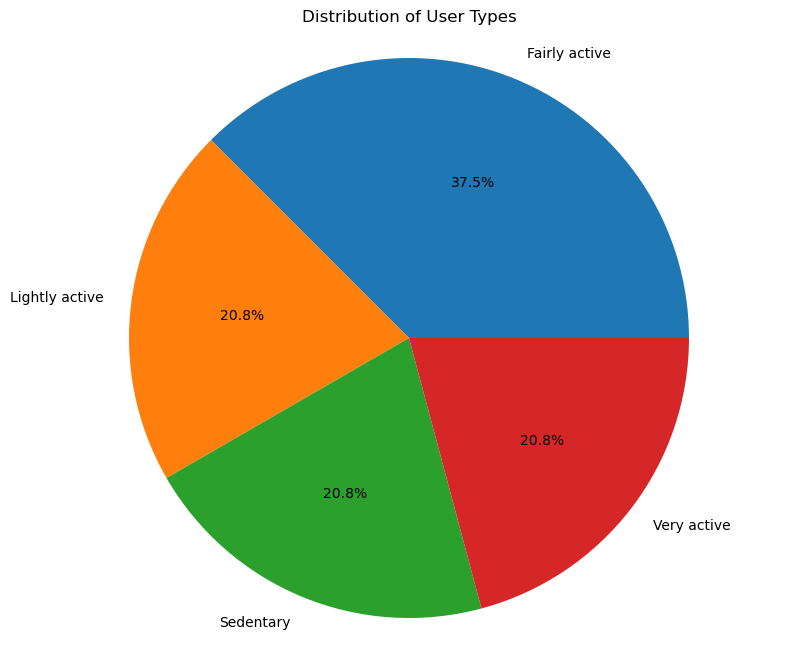

In [9]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(user_type_percent['total'], labels=user_type_percent['user_type'], autopct='%1.1f%%')
plt.title('Distribution of User Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

These categories offer insights into the distribution of user activity levels within the dataset, with fairly active users being the largest group, followed by lightly active, sedentary, and very active users.

**I will now determine if there is any correlation between different variables:**

Creating a scatter plot to visualize the relationship between the ‘TotalSteps’ and ‘Calories’ variables.

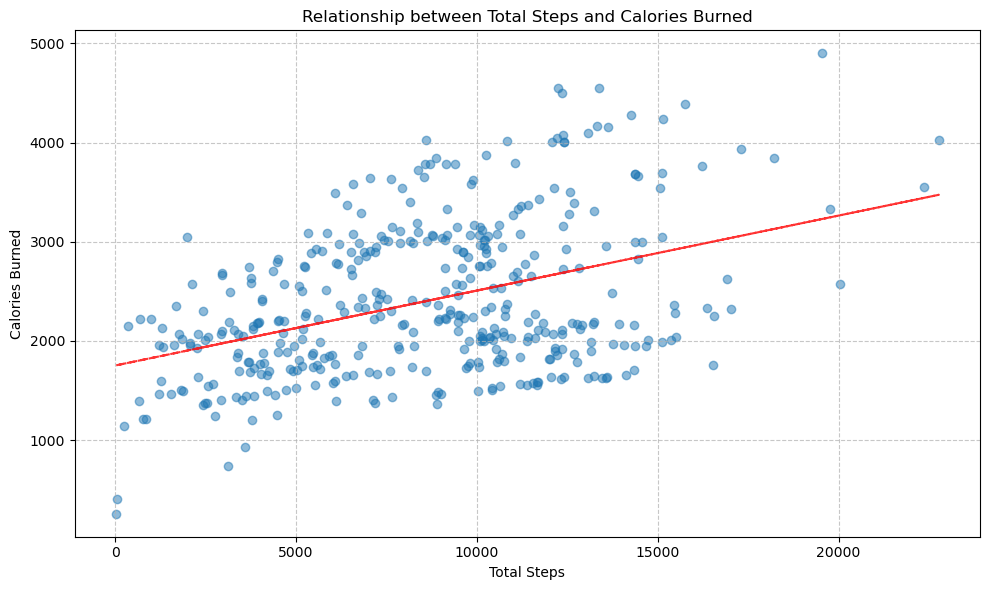

Correlation coefficient between Total Steps and Calories: 0.41


In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_activity_sleep['TotalSteps'], daily_activity_sleep['Calories'], alpha=0.5)
plt.title('Relationship between Total Steps and Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a trend line
z = np.polyfit(daily_activity_sleep['TotalSteps'], daily_activity_sleep['Calories'], 1)
p = np.poly1d(z)
plt.plot(daily_activity_sleep['TotalSteps'], p(daily_activity_sleep['TotalSteps']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = daily_activity_sleep['TotalSteps'].corr(daily_activity_sleep['Calories'])
print(f"Correlation coefficient between Total Steps and Calories: {correlation:.2f}")

**As one might expect, there’s a correlation between daily steps and calories. The more steps taken, the more calories one may burn.**

A correlation coefficient of 0.41 between Total Steps and Calories suggests a moderate positive relationship between the two variables. This means that as the number of steps increases, the number of calories burned tends to increase as well, though the relationship is not very strong.

In practical terms, while there is a general trend where people who take more steps also burn more calories, other factors could also be influencing calorie burn, and the steps alone don't fully explain the variation in calories burned.

**Creating a scatter plot to visualize the relationship between the ‘Total Minutes Asleep’ and ‘Total Time in Bed’ variables.**

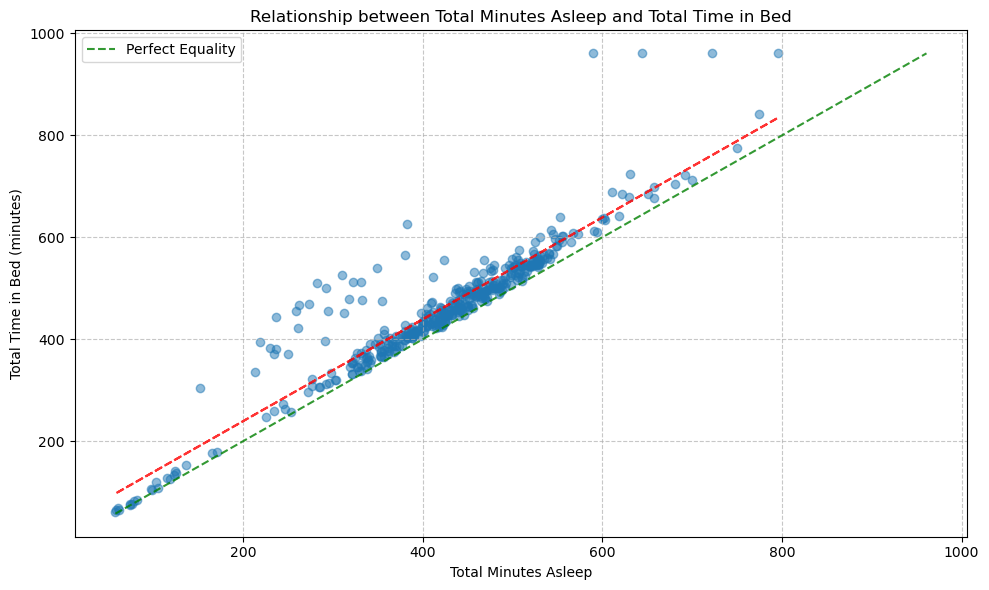

Correlation coefficient between Total Minutes Asleep and Total Time in Bed: 0.93


In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_activity_sleep['TotalMinutesAsleep'], daily_activity_sleep['TotalTimeInBed'], alpha=0.5)
plt.title('Relationship between Total Minutes Asleep and Total Time in Bed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a trend line
z = np.polyfit(daily_activity_sleep['TotalMinutesAsleep'], daily_activity_sleep['TotalTimeInBed'], 1)
p = np.poly1d(z)
plt.plot(daily_activity_sleep['TotalMinutesAsleep'], p(daily_activity_sleep['TotalMinutesAsleep']), "r--", alpha=0.8)

# Add a diagonal line representing perfect equality
min_val = min(daily_activity_sleep['TotalMinutesAsleep'].min(), daily_activity_sleep['TotalTimeInBed'].min())
max_val = max(daily_activity_sleep['TotalMinutesAsleep'].max(), daily_activity_sleep['TotalTimeInBed'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--', alpha=0.8, label='Perfect Equality')

plt.legend()
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = daily_activity_sleep['TotalMinutesAsleep'].corr(daily_activity_sleep['TotalTimeInBed'])
print(f"Correlation coefficient between Total Minutes Asleep and Total Time in Bed: {correlation:.2f}")

The strong positive correlation (0.93) between Total Minutes Asleep and Total Time in Bed means that there is a very close relationship between the amount of time users spend in bed and the time they actually spend sleeping. 

In other words, most of the time users spend in bed is used for sleeping, indicating efficient sleep patterns. A correlation of 0.93 suggests that as the time spent in bed increases, the time spent asleep also increases in a very consistent manner.

# Insights
*Maintain Consistent Bedtimes: Try to go to bed and wake up at the same time every day, even on weekends. Consistency helps regulate your internal clock and improves sleep quality.

**Analyzing Hourly Patterns in Total Intensity with a Bar Chart**

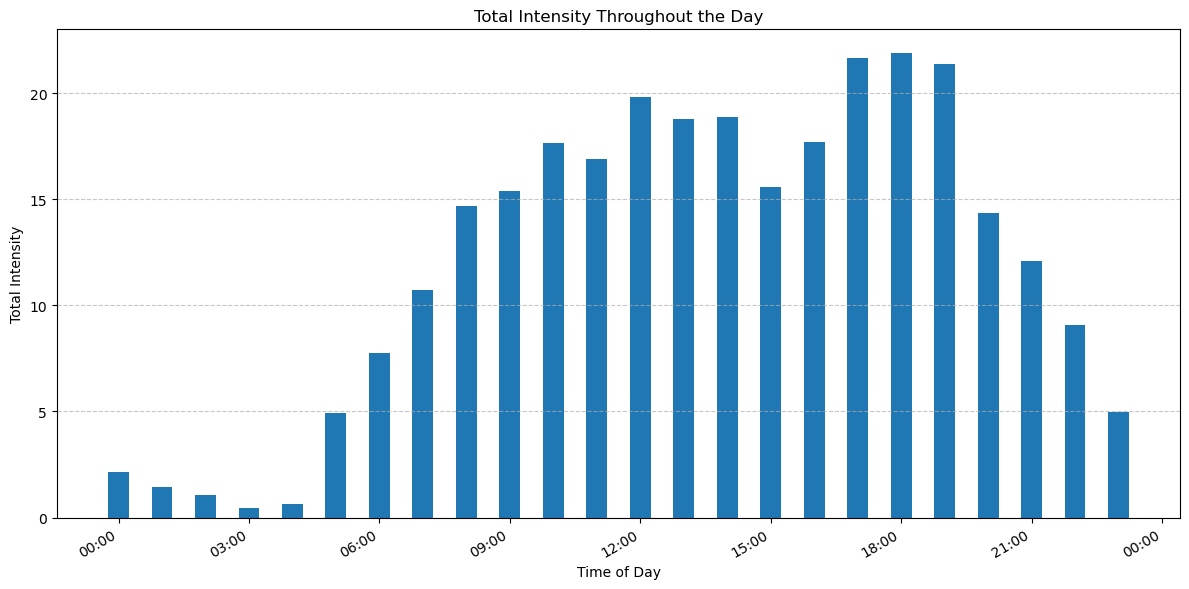

In [12]:
# Group by hour and calculate mean total intensity
hourly_intensities = intensities_df.groupby('Hour')['TotalIntensity'].mean().reset_index()

# Convert Hour to datetime for proper ordering
hourly_intensities['Hour'] = pd.to_datetime(hourly_intensities['Hour'], format='%H:%M:%S')

# Sort by hour
hourly_intensities = hourly_intensities.sort_values('Hour')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(hourly_intensities['Hour'], hourly_intensities['TotalIntensity'], width=0.02, align='center')

plt.title('Total Intensity Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Intensity')

# Format x-axis to show hours
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()  # Rotation

plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

* After analyzing the hourly Total Intensity data, it’s evident that individuals tend to be more active from 5 am to 10 pm.
* The peak of physical activity occurs between 5 pm and 7 pm, possibly suggesting that people engage in exercise or outdoor activities after their workday.

# Insights:

* Consider planning your workouts or physical activities between 5 pm and 7 pm, as this is when most people tend to be most active. Engaging in exercise during these hours can help you align with natural energy levels and maximize your workout efficiency.
* If you're active in the early morning hours (from 5 am), incorporate a morning exercise routine to boost your energy and set a positive tone for the day. Morning activity can improve focus and productivity throughout the day.
* If you're active in the evening, consider incorporating calming exercises like yoga or a gentle walk after 7 pm to help wind down and prepare your body for restful sleep.

